In [1]:
## Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

### Link of the Kaggle Dataset
https://www.kaggle.com/datasets/usdot/flight-delays

## Reading all the csv files in pandas DataFrame

In [2]:
airlines = pd.read_csv('airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [3]:
airlines.shape # Shape of the DataFrame

(14, 2)

In [4]:
airports = pd.read_csv('airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
airports.shape # Shape of the DataFrame

(322, 7)

In [6]:
low_memory = False

In [7]:
flights = pd.read_csv('flights.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
flights.shape # Shape of the DataFrame

(5819079, 31)

In [9]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [10]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [11]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### I will work on the flight.csv data because it has enough and relevant data comapres to two other csv files.

In [12]:
flights.isnull().sum() ## Checking the missing values in the DataFrame

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [13]:
## There are lot of missing values in the DataFrame, So we have to handle them.

In [14]:
flights.columns ## Columns of the DataFrame

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [15]:
flights['YEAR'].unique() ## Checking the unique values in the YEAR column

array([2015], dtype=int64)

In [16]:
## Dropping the column YEAR, Becaues it has only 1 unique value which has no use in data
flights.drop(columns=['YEAR'], inplace=True)
flights.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
flights['AIRLINE'].unique() ## Checking the unique values of the column AIRLINE

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

In [18]:
## Checking the percentage of missing values in cetarin columns

print(flights['CANCELLATION_REASON'].isnull().mean())
print(flights['AIR_SYSTEM_DELAY'].isnull().mean())
print(flights['SECURITY_DELAY'].isnull().mean())
print(flights['AIRLINE_DELAY'].isnull().mean())
print(flights['LATE_AIRCRAFT_DELAY'].isnull().mean())
print(flights['WEATHER_DELAY'].isnull().mean())

0.9845535693878705
0.8172496025573807
0.8172496025573807
0.8172496025573807
0.8172496025573807
0.8172496025573807


In [19]:
# As in the above mentioned cells, these features has more than 80% missing values. So we can drop these columns

flights.drop(columns=['CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                     'WEATHER_DELAY'], inplace=True)
flights.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [20]:
flights.isnull().sum() ## Checking again the missing values in the columns

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

## Handling the missing values

In [21]:
flights['TAIL_NUMBER'].head()

0    N407AS
1    N3KUAA
2    N171US
3    N3HYAA
4    N527AS
Name: TAIL_NUMBER, dtype: object

In [22]:
flights['TAIL_NUMBER'].unique() ## Checking the unique values

array(['N407AS', 'N3KUAA', 'N171US', ..., 'N7LEAA', 'N850DN', 'N8676A'],
      dtype=object)

In [23]:
flights['TAIL_NUMBER'].value_counts() ## Checking the size of the unique values of the TAIL_NUMBER column

N480HA    3768
N488HA    3723
N484HA    3723
N493HA    3585
N478HA    3577
          ... 
N175UA       1
N852NW       1
N7LBAA       1
N7LEAA       1
N180UA       1
Name: TAIL_NUMBER, Length: 4897, dtype: int64

In [24]:
flights['DEPARTURE_TIME'].head()

0    2354.0
1       2.0
2      18.0
3      15.0
4      24.0
Name: DEPARTURE_TIME, dtype: float64

In [25]:
flights['DEPARTURE_TIME'].value_counts() ## Checking the size of the unique values of the DEPARTURE_TIME column

555.0    14829
556.0    13976
557.0    13616
558.0    12954
655.0    12391
         ...  
338.0        6
428.0        6
438.0        4
433.0        3
403.0        3
Name: DEPARTURE_TIME, Length: 1440, dtype: int64

In [26]:
## Checking the max, min, and mean values of the DEPARTURE_TIME column

print(flights['DEPARTURE_TIME'].max())
print(flights['DEPARTURE_TIME'].min())
print(flights['DEPARTURE_TIME'].mean())

2400.0
1.0
1335.2044390595659


In [27]:
## Checking the max, min, and mean values of the DEPARTURE_DELAY column

print(flights['DEPARTURE_DELAY'].max())
print(flights['DEPARTURE_DELAY'].min())
print(flights['DEPARTURE_DELAY'].mean())

1988.0
-82.0
9.370158275198389


In [28]:
## Checking the max, min, and mean values of the TAXI_OUT column

print(flights['TAXI_OUT'].max())
print(flights['TAXI_OUT'].min())
print(flights['TAXI_OUT'].mean())

225.0
1.0
16.07166225249702


In [29]:
## Filling the missing values with mean of the columns

flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].fillna(flights['DEPARTURE_TIME'].mean())
flights['DEPARTURE_DELAY'] = flights['DEPARTURE_DELAY'].fillna(flights['DEPARTURE_DELAY'].mean())
flights['TAXI_OUT'] = flights['TAXI_OUT'].fillna(flights['TAXI_OUT'].mean())
flights['WHEELS_OFF'] = flights['WHEELS_OFF'].fillna(flights['WHEELS_OFF'].mean())
flights['SCHEDULED_TIME'] = flights['SCHEDULED_TIME'].fillna(flights['SCHEDULED_TIME'].mean())
flights['AIR_TIME'] = flights['AIR_TIME'].fillna(flights['AIR_TIME'].mean())
flights['WHEELS_ON'] = flights['WHEELS_ON'].fillna(flights['WHEELS_ON'].mean())
flights['TAXI_IN'] = flights['TAXI_IN'].fillna(flights['TAXI_IN'].mean())
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].fillna(flights['ARRIVAL_DELAY'].mean())
flights['ARRIVAL_DELAY'] = flights['ARRIVAL_DELAY'].fillna(flights['ARRIVAL_DELAY'].mean())
flights['ELAPSED_TIME'] = flights['ELAPSED_TIME'].fillna(flights['ELAPSED_TIME'].mean())

In [30]:
flights.isnull().sum() ## Checking the missing values again

MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
dtype: int64

In [31]:
flights['TAIL_NUMBER'].value_counts() ## Checking the size of the unique values of the TAIL_NUMBER column

N480HA    3768
N488HA    3723
N484HA    3723
N493HA    3585
N478HA    3577
          ... 
N175UA       1
N852NW       1
N7LBAA       1
N7LEAA       1
N180UA       1
Name: TAIL_NUMBER, Length: 4897, dtype: int64

In [32]:
## Filling the missing values of the TAIL_NUMBER Colums with mostly used string the column

flights['TAIL_NUMBER'] = flights['TAIL_NUMBER'].fillna('N480HA')

In [33]:
flights.isnull().sum()  ## Checking the missing values again

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

## All the missing values are handled, now moving to the next step

## Question 1:

### Do certain routes commonly end up delayed or cancelled across all airlines?

In [34]:
flights.columns ## Columns of the DataFrame

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

In [35]:
flights[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'CANCELLED', 'DISTANCE']].head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED,DISTANCE
0,ANC,SEA,-11.0,-22.0,0,1448
1,LAX,PBI,-8.0,-9.0,0,2330
2,SFO,CLT,-2.0,5.0,0,2296
3,LAX,MIA,-5.0,-9.0,0,2342
4,SEA,ANC,-1.0,-21.0,0,1448


In [36]:
## Create a new column with name ROUTE by adding two columns (ORIGIN_AIRPORT and DESTINATION_AIRPORT) with a special string

flights['ROUTE'] = flights['ORIGIN_AIRPORT'].astype(str) + '--->' + flights['DESTINATION_AIRPORT'].astype(str)

In [37]:
flights[['ROUTE']].head() ## Checking the first five rows of the ROUTE column

,ROUTE
0,ANC--->SEA
1,LAX--->PBI
2,SFO--->CLT
3,LAX--->MIA
4,SEA--->ANC


In [38]:
flights['ROUTE'].dtype ## Checking the type of the ROUTE column

dtype('O')

In [39]:
flights[['ROUTE', 'CANCELLED']].head() ## Checking the first five rows of the ROUTE and CANCELLED columns

,ROUTE,CANCELLED
0,ANC--->SEA,0
1,LAX--->PBI,0
2,SFO--->CLT,0
3,LAX--->MIA,0
4,SEA--->ANC,0


In [40]:
flights['CANCELLED'].value_counts() ## Cecking the counts of the values of the CANCELLED column

0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [41]:
## Replacing the negative and zero values of DEPARTURE_DELAY with 0 

for i in flights['DEPARTURE_DELAY'].unique():
    if i<=0:
        flights['DEPARTURE_DELAY'].replace(i, 0, inplace=True)

In [42]:
## Replacing the positive values of the DEPARTURE_DELAY column with 1

for i in flights['DEPARTURE_DELAY'].unique():
    if i>0:
        flights['DEPARTURE_DELAY'].replace(i, 1, inplace=True)

In [43]:
flights['DEPARTURE_DELAY'].unique() ## Checking the unique values again

array([0., 1.])

In [44]:
flights['DEPARTURE_DELAY'].dtype  ## Checking the type of the DEPARTURE_DELAY column

dtype('float64')

In [45]:
## Grouping the ROUTE column on the basis CANCELLED and DEPARTURE_DELAY column 

flights.groupby(['CANCELLED', 'DEPARTURE_DELAY'])['ROUTE'].apply(list)

CANCELLED  DEPARTURE_DELAY
0          0.0                [ANC--->SEA, LAX--->PBI, SFO--->CLT, LAX--->MI...
           1.0                [LAX--->CLT, LAS--->ATL, LAS--->MCI, MSP--->FL...
1          0.0                [IAH--->BRO, ORD--->CVG, LGA--->IAD, MCO--->OM...
           1.0                [ANC--->SEA, PHX--->DFW, MAF--->IAH, SGF--->DF...
Name: ROUTE, dtype: object

In [46]:
## Extracting the list of the certain ROUTES which commonly end up delayed or cancelled

Routes_Cancelled_or_delayed_1 = flights.groupby(['CANCELLED', 'DEPARTURE_DELAY'])['ROUTE'].apply(list)[0][1]
Routes_Cancelled_or_delayed_1

['LAX--->CLT',
 'LAS--->ATL',
 'LAS--->MCI',
 'MSP--->FLL',
 'DEN--->MIA',
 'PHX--->ORD',
 'SJU--->EWR',
 'SJU--->MCO',
 'BQN--->MCO',
 'SJU--->BDL',
 'ONT--->SFO',
 'ORD--->IAH',
 'DFW--->MIA',
 'MKE--->IAH',
 'PDX--->PHX',
 'IAH--->MIA',
 'BOI--->SFO',
 'PHL--->IAH',
 'PDX--->DEN',
 'DEN--->DFW',
 'SFO--->DEN',
 'ORD--->DEN',
 'IAD--->IAH',
 'JFK--->SJU',
 'ORD--->DTW',
 'SMF--->DEN',
 'PHX--->DTW',
 'MCI--->ATL',
 'ATL--->IAD',
 'DCA--->IAH',
 'JFK--->MIA',
 'BOS--->PBI',
 'DFW--->ATL',
 'MKE--->DEN',
 'DEN--->LAX',
 'CLE--->IAH',
 'BOS--->EWR',
 'LAX--->DFW',
 'BFL--->DEN',
 'SAT--->SFO',
 'OMA--->IAH',
 'MCO--->LAX',
 'BUF--->EWR',
 'ONT--->DEN',
 'PHX--->IAH',
 'EWR--->MCO',
 'OMA--->ORD',
 'PIT--->IAH',
 'LAS--->BWI',
 'ABQ--->HOU',
 'PHX--->SLC',
 'PVD--->BWI',
 'PDX--->IAH',
 'SFO--->LAX',
 'SAT--->LAX',
 'BOS--->LAX',
 'SEA--->EWR',
 'LAX--->ORD',
 'DFW--->MCO',
 'MIA--->PHL',
 'SLC--->DFW',
 'BWI--->MIA',
 'DEN--->ORD',
 'MCI--->DFW',
 'LGA--->MIA',
 'SMF--->DFW',
 'OKC--->D

In [47]:
len(Routes_Cancelled_or_delayed_1) ## Checking the lenght of the list 

2123078

In [48]:
## Extracting the list of the certain ROUTES which commonly end up delayed or cancelled

Routes_Cancelled_or_delayed_2 = flights.groupby(['CANCELLED', 'DEPARTURE_DELAY'])['ROUTE'].apply(list)[1][0]
Routes_Cancelled_or_delayed_2

['IAH--->BRO',
 'ORD--->CVG',
 'LGA--->IAD',
 'MCO--->OMA',
 'SFO--->MFR',
 'ATL--->HPN',
 'DTW--->OMA',
 'FAT--->PHX',
 'DCA--->BNA',
 'JFK--->DCA',
 'BOS--->PHL',
 'MSP--->IMT',
 'SFO--->LGB',
 'CID--->ATL',
 'BWI--->CLT',
 'DEN--->PUB',
 'LAS--->MIA',
 'FLL--->SWF',
 'SAN--->BOI',
 'LAX--->GEG',
 'MEM--->EWR',
 'BUF--->BWI',
 'GRB--->DTW',
 'SLC--->SJC',
 'DEN--->GCC',
 'ATL--->MDW',
 'DFW--->PIT',
 'EAU--->ORD',
 'LGA--->MDW',
 'PHX--->DEN',
 'LAX--->DEN',
 'LAS--->DEN',
 'DEN--->TUL',
 'CLE--->ATL',
 'ORD--->LGA',
 'LGA--->DCA',
 'BOS--->LGA',
 'BOS--->LGA',
 'SLC--->TWF',
 'PHL--->ORD',
 'SFO--->SMF',
 'STL--->DEN',
 'DFW--->BOS',
 'DTW--->TVC',
 'OMA--->IAH',
 'SLC--->SUN',
 'PIA--->ORD',
 'DEN--->DRO',
 'SLC--->TWF',
 'LAX--->MSP',
 'JFK--->RDU',
 'ATL--->EWN',
 'EWR--->MIA',
 'PHX--->SFO',
 'SFO--->SMF',
 'HNL--->KOA',
 'IND--->IAH',
 'DEN--->COD',
 'BOS--->RIC',
 'PIT--->PHL',
 'LAX--->FAT',
 'PHX--->DRO',
 'JAN--->DFW',
 'DTW--->TVC',
 'RAP--->DEN',
 'MSP--->ABR',
 'DEN--->D

In [49]:
len(Routes_Cancelled_or_delayed_2) ## Checking the lenght of the list

1191

In [50]:
## Adding the both list of certain routes which commonly end up delayed or cancelled 

Routes_Cancelled_or_delayed = Routes_Cancelled_or_delayed_1 + Routes_Cancelled_or_delayed_2
Routes_Cancelled_or_delayed

['LAX--->CLT',
 'LAS--->ATL',
 'LAS--->MCI',
 'MSP--->FLL',
 'DEN--->MIA',
 'PHX--->ORD',
 'SJU--->EWR',
 'SJU--->MCO',
 'BQN--->MCO',
 'SJU--->BDL',
 'ONT--->SFO',
 'ORD--->IAH',
 'DFW--->MIA',
 'MKE--->IAH',
 'PDX--->PHX',
 'IAH--->MIA',
 'BOI--->SFO',
 'PHL--->IAH',
 'PDX--->DEN',
 'DEN--->DFW',
 'SFO--->DEN',
 'ORD--->DEN',
 'IAD--->IAH',
 'JFK--->SJU',
 'ORD--->DTW',
 'SMF--->DEN',
 'PHX--->DTW',
 'MCI--->ATL',
 'ATL--->IAD',
 'DCA--->IAH',
 'JFK--->MIA',
 'BOS--->PBI',
 'DFW--->ATL',
 'MKE--->DEN',
 'DEN--->LAX',
 'CLE--->IAH',
 'BOS--->EWR',
 'LAX--->DFW',
 'BFL--->DEN',
 'SAT--->SFO',
 'OMA--->IAH',
 'MCO--->LAX',
 'BUF--->EWR',
 'ONT--->DEN',
 'PHX--->IAH',
 'EWR--->MCO',
 'OMA--->ORD',
 'PIT--->IAH',
 'LAS--->BWI',
 'ABQ--->HOU',
 'PHX--->SLC',
 'PVD--->BWI',
 'PDX--->IAH',
 'SFO--->LAX',
 'SAT--->LAX',
 'BOS--->LAX',
 'SEA--->EWR',
 'LAX--->ORD',
 'DFW--->MCO',
 'MIA--->PHL',
 'SLC--->DFW',
 'BWI--->MIA',
 'DEN--->ORD',
 'MCI--->DFW',
 'LGA--->MIA',
 'SMF--->DFW',
 'OKC--->D

In [51]:
len(Routes_Cancelled_or_delayed) ## Checking the length of the list

2124269

In [52]:
## Extracting the unique values of the list

Final_Routes_Cancelled_or_delayed = set(Routes_Cancelled_or_delayed)
Final_Routes_Cancelled_or_delayed

{'13029--->13487',
 'ORD--->MIA',
 'MCO--->GRR',
 'FLL--->MYR',
 '11298--->12953',
 'ATL--->ATW',
 '11298--->15249',
 'DFW--->MEM',
 'EWR--->RIC',
 'LAN--->DTW',
 'BOS--->DAL',
 '14771--->13264',
 'ATL--->MSN',
 '13204--->14524',
 'HNL--->LAS',
 '10781--->12266',
 '12266--->12389',
 'XNA--->IAH',
 '13303--->10721',
 'SLC--->SGU',
 'JFK--->MCO',
 'CLT--->ORD',
 'CMH--->PHX',
 '13930--->13487',
 '12478--->12451',
 '14122--->10397',
 '14747--->12889',
 'LAS--->BNA',
 '10821--->10994',
 '13851--->10397',
 'MQT--->DTW',
 'FLL--->ORH',
 'DCA--->BTR',
 '14709--->10299',
 '10994--->10721',
 '12889--->11540',
 'GJT--->DEN',
 'PHX--->GJT',
 'HOU--->CHS',
 '14869--->13204',
 'PHX--->SLC',
 '12992--->11298',
 'SJU--->CLT',
 '10693--->12892',
 'IND--->MSP',
 '13930--->14107',
 'DFW--->SGF',
 'IND--->BWI',
 '11638--->12892',
 'MIA--->DFW',
 'ELP--->PHX',
 '12896--->11259',
 '14262--->14869',
 '11298--->11697',
 'LAX--->EWR',
 '14635--->10158',
 '14492--->11298',
 '11618--->10529',
 '14771--->11603',

In [53]:
len(Final_Routes_Cancelled_or_delayed) ## Checking the length of the list

8492

In [54]:
## Converting the set into Final list of certain Routes that commonly end up delayed or cancelled accorss all airlines

Routes_Cancelled_or_delayed_Final_List = list(Final_Routes_Cancelled_or_delayed)
Routes_Cancelled_or_delayed_Final_List

['13029--->13487',
 'ORD--->MIA',
 'MCO--->GRR',
 'FLL--->MYR',
 '11298--->12953',
 'ATL--->ATW',
 '11298--->15249',
 'DFW--->MEM',
 'EWR--->RIC',
 'LAN--->DTW',
 'BOS--->DAL',
 '14771--->13264',
 'ATL--->MSN',
 '13204--->14524',
 'HNL--->LAS',
 '10781--->12266',
 '12266--->12389',
 'XNA--->IAH',
 '13303--->10721',
 'SLC--->SGU',
 'JFK--->MCO',
 'CLT--->ORD',
 'CMH--->PHX',
 '13930--->13487',
 '12478--->12451',
 '14122--->10397',
 '14747--->12889',
 'LAS--->BNA',
 '10821--->10994',
 '13851--->10397',
 'MQT--->DTW',
 'FLL--->ORH',
 'DCA--->BTR',
 '14709--->10299',
 '10994--->10721',
 '12889--->11540',
 'GJT--->DEN',
 'PHX--->GJT',
 'HOU--->CHS',
 '14869--->13204',
 'PHX--->SLC',
 '12992--->11298',
 'SJU--->CLT',
 '10693--->12892',
 'IND--->MSP',
 '13930--->14107',
 'DFW--->SGF',
 'IND--->BWI',
 '11638--->12892',
 'MIA--->DFW',
 'ELP--->PHX',
 '12896--->11259',
 '14262--->14869',
 '11298--->11697',
 'LAX--->EWR',
 '14635--->10158',
 '14492--->11298',
 '11618--->10529',
 '14771--->11603',

In [55]:
len(Routes_Cancelled_or_delayed_Final_List) ## Checking the length of the list

8492

In [56]:
## List of certain Routes that commonly end up delayed or cancelled accorss all airlines
Routes_Cancelled_or_delayed_Final_List

['13029--->13487',
 'ORD--->MIA',
 'MCO--->GRR',
 'FLL--->MYR',
 '11298--->12953',
 'ATL--->ATW',
 '11298--->15249',
 'DFW--->MEM',
 'EWR--->RIC',
 'LAN--->DTW',
 'BOS--->DAL',
 '14771--->13264',
 'ATL--->MSN',
 '13204--->14524',
 'HNL--->LAS',
 '10781--->12266',
 '12266--->12389',
 'XNA--->IAH',
 '13303--->10721',
 'SLC--->SGU',
 'JFK--->MCO',
 'CLT--->ORD',
 'CMH--->PHX',
 '13930--->13487',
 '12478--->12451',
 '14122--->10397',
 '14747--->12889',
 'LAS--->BNA',
 '10821--->10994',
 '13851--->10397',
 'MQT--->DTW',
 'FLL--->ORH',
 'DCA--->BTR',
 '14709--->10299',
 '10994--->10721',
 '12889--->11540',
 'GJT--->DEN',
 'PHX--->GJT',
 'HOU--->CHS',
 '14869--->13204',
 'PHX--->SLC',
 '12992--->11298',
 'SJU--->CLT',
 '10693--->12892',
 'IND--->MSP',
 '13930--->14107',
 'DFW--->SGF',
 'IND--->BWI',
 '11638--->12892',
 'MIA--->DFW',
 'ELP--->PHX',
 '12896--->11259',
 '14262--->14869',
 '11298--->11697',
 'LAX--->EWR',
 '14635--->10158',
 '14492--->11298',
 '11618--->10529',
 '14771--->11603',

## Answer:
### Yes there are cetain routes that commonly end up delayed or cancelled accross all airlines. The list of these routes is in the above cell.

## Visualization of Results

<AxesSubplot:xlabel='CANCELLED', ylabel='count'>

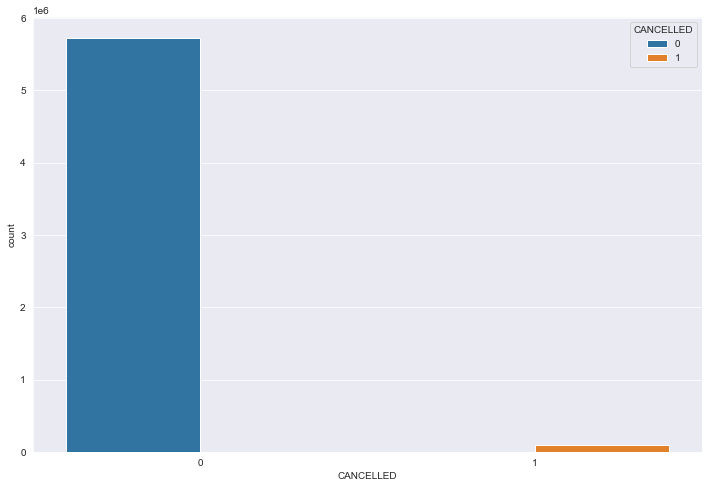

In [57]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x='CANCELLED', data=flights, hue='CANCELLED')

## Question 2:

### Create a forecast for the count of cancellations on United Airlines with the destination in the state of california in the month of december.

In [58]:
flights.head() ## First five rows of the dataframe

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,ROUTE
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,ANC--->SEA
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,LAX--->PBI
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,SFO--->CLT
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,LAX--->MIA
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,SEA--->ANC


In [59]:
flights['AIRLINE'].unique() ## Checking the unique values of the column AIRLINE

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

In [60]:
flights['DESTINATION_AIRPORT'].unique() ## Checking the unique values of the column DESTINATION_AIRPORT

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

In [61]:
flights['MONTH'].unique()  ## Checking the unique values of the column MONTH

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [62]:
## Replacing the strings of the DESTINATION_AIRPORT column which belongs the airports of the california state with CA.   

flights['DESTINATION_AIRPORT'].replace('ACV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BFL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BUR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CCR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('FAT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('LGB', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('LAX', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MMH', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MRY', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('OAK', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('ONT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SNA', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('PSP', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RDD', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SMF', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SAN', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SFO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SJC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SBP', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SBA', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SMX', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('STS', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SCK', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CRQ', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CEC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('IPL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MCE', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CMA', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CNO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CPM', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('EMT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('FCH', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('FUL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('HAF', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('HHR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('HWD', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('POC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('LHM', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('LVK', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('WHP', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('APC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('DVO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('PAO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RNM', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RAL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RIV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SAC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MHR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SBD', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SQL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SDM', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MYF', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SEE', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RHV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SMO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TOA', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CCB', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('VNY', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('VCV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('AAT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('APV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MER', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('AUN', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BNG', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BIH', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BLH', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BWC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CXL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('AJO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('DAG', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('EDU', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('DWA', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('DLO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('EKA', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('FOT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('GOO', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('HES', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('HMT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CVH', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('IYK', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('JAQ', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('KIC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('WJF', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('LLR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('LPC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('LSN', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MAE', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('OAR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MPI', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MYV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MOD', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MHV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SIY', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('EED', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('OKB', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('OVE', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('OXR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TRM', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('PMD', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('PRB', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('PVF', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('PTV', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RIU', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RBL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('REI', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MCC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SNS', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CPU', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('IZA', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('MIT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TVL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SVE', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TSP', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TCY', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TRK', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TLR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('TNP', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('UKI', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('VCB', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('WVI', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('WLW', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('AVX', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CLR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BLU', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('UDD', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('RIR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SAS', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SZP', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SYL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('CSL', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NID', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NCR', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('EDW', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NJK', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SUU', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('HGT', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BYS', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('AHC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NRS', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NLC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('VBG', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('SLI', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('BAB', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NUQ', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NFG', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NTD', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NUC', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NKX', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NZY', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NSI', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('NXP', 'CA', inplace=True)
flights['DESTINATION_AIRPORT'].replace('GXA', 'CA', inplace=True)

In [63]:
## Creating a new pandas DataFrame which consist of California state destination of united airline in the month of december

Cancellation_Forecast = flights[flights['AIRLINE'] == 'UA'][flights['MONTH'] == 12][flights['DESTINATION_AIRPORT'] == 'CA']
Cancellation_Forecast

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,ROUTE
5339859,12,1,2,UA,1730,N27421,HNL,CA,29,32.0,...,276.0,2398,726.0,7.0,754,733.0,-21.0,0,0,HNL--->SFO
5340187,12,1,2,UA,392,N69840,PDX,CA,545,544.0,...,77.0,550,711.0,5.0,740,716.0,-24.0,0,0,PDX--->SFO
5340410,12,1,2,UA,261,N486UA,SFO,CA,600,557.0,...,51.0,337,701.0,11.0,736,712.0,-24.0,0,0,SFO--->LAX
5340411,12,1,2,UA,550,N529UA,ORD,CA,600,918.0,...,229.0,1846,1125.0,21.0,852,1146.0,174.0,0,0,ORD--->SFO
5340414,12,1,2,UA,653,N409UA,PHL,CA,600,618.0,...,325.0,2521,856.0,10.0,920,906.0,-14.0,0,0,PHL--->SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818925,12,31,4,UA,337,N63820,LAX,CA,2245,2339.0,...,54.0,337,45.0,3.0,12,48.0,36.0,0,0,LAX--->SFO
5818941,12,31,4,UA,498,N37267,SFO,CA,2252,2250.0,...,62.0,447,3.0,3.0,21,6.0,-15.0,0,0,SFO--->SAN
5818976,12,31,4,UA,1110,N76516,OGG,CA,2310,2308.0,...,263.0,2486,539.0,10.0,636,549.0,-47.0,0,0,OGG--->LAX
5819018,12,31,4,UA,1229,N57869,HNL,CA,2336,2345.0,...,266.0,2556,625.0,33.0,705,658.0,-7.0,0,0,HNL--->LAX


In [64]:
Cancellation_Forecast[['CANCELLED']]

,CANCELLED
5339859,0
5340187,0
5340410,0
5340411,0
5340414,0
...,...
5818925,0
5818941,0
5818976,0
5819018,0


In [65]:
## Counting the value of the cancelled column of new DataFrame

Cancellation_Forecast['CANCELLED'].value_counts()

0    7838
1     123
Name: CANCELLED, dtype: int64

##  Answer:
### So the forecast of the count of cancellation of the United Airlines with the destinations in the state of California in the month of December is 123.

In [66]:
Cancellation_Forecast['CANCELLED'].dtype ## Checking the type of the cancelled column

dtype('int64')

In [67]:
Cancellation_Forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7961 entries, 5339859 to 5819034
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                7961 non-null   int64  
 1   DAY                  7961 non-null   int64  
 2   DAY_OF_WEEK          7961 non-null   int64  
 3   AIRLINE              7961 non-null   object 
 4   FLIGHT_NUMBER        7961 non-null   int64  
 5   TAIL_NUMBER          7961 non-null   object 
 6   ORIGIN_AIRPORT       7961 non-null   object 
 7   DESTINATION_AIRPORT  7961 non-null   object 
 8   SCHEDULED_DEPARTURE  7961 non-null   int64  
 9   DEPARTURE_TIME       7961 non-null   float64
 10  DEPARTURE_DELAY      7961 non-null   float64
 11  TAXI_OUT             7961 non-null   float64
 12  WHEELS_OFF           7961 non-null   float64
 13  SCHEDULED_TIME       7961 non-null   float64
 14  ELAPSED_TIME         7961 non-null   float64
 15  AIR_TIME             7961 non

In [68]:
Cancellation_Forecast['CANCELLED'].unique()  ## Unique values of the cancelled column

array([0, 1], dtype=int64)

## Visulaization of the Forecast

<AxesSubplot:xlabel='CANCELLED', ylabel='count'>

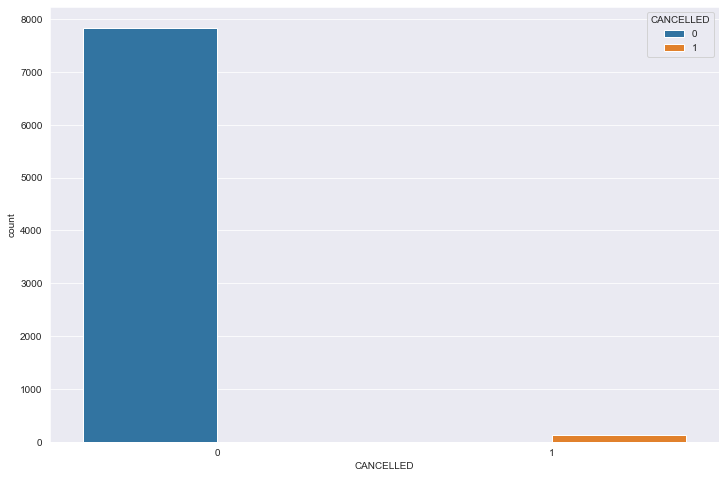

In [69]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x='CANCELLED', data = Cancellation_Forecast, hue='CANCELLED')

In [70]:
x = Cancellation_Forecast['CANCELLED'].value_counts()
x

0    7838
1     123
Name: CANCELLED, dtype: int64

In [71]:
y = Cancellation_Forecast['CANCELLED'].unique()
y

array([0, 1], dtype=int64)

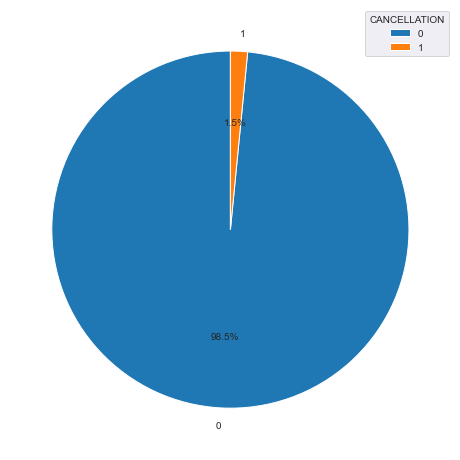

In [72]:
plt.figure(figsize = (8,12))
plt.pie(x, labels=y, startangle=90, autopct='%2.1f%%')
plt.legend(title='CANCELLATION')
plt.show()


In [73]:
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED
## Notebook ENDED